In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date,datetime,timedelta
from sklearn.metrics import pairwise
%matplotlib inline

In [20]:
#import intelliekon data (add path)
df = pd.read_csv("Path to data")
df.head()

/Users/tamo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,datetime,ID,Fall_ge1,IdCons,Datum,Hour_of_Year,Season,Weekday,Hour_of_Day,Fehlerfeld,Daten_Herkunft,Electricity_Demand,dateyear
0,2009-10-06 01:00:00,1,636,391943,6/10/2009,6673,0,1,1,0,Münster,215.0,2009
1,2009-10-07 01:00:00,2,636,391943,7/10/2009,6697,0,1,1,0,Münster,196.0,2009
2,2009-10-08 01:00:00,3,636,391943,8/10/2009,6721,0,1,1,0,Münster,235.0,2009
3,2009-10-09 01:00:00,4,636,391943,9/10/2009,6745,0,1,1,0,Münster,250.0,2009
4,2009-10-10 01:00:00,5,636,391943,10/10/2009,6769,0,2,1,0,Münster,288.0,2009


In [21]:
#convert Datum and Hour_of_Day to datetime format
df["datetime"] = pd.to_datetime(df["Datum"],dayfirst = True) + df["Hour_of_Day"].astype("timedelta64[h]")
df.set_index("datetime", inplace = True)

In [22]:
df_norm_day = df.copy()

#normalisation based on the maximum value of the data set:
df["max_energy"] = df.groupby(["Fall_ge1"])["Electricity_Demand"].transform(max)
df['norm_energy'] = df['Electricity_Demand'] / df['max_energy']

#normalisation based on the maximum value of each day:
df_norm_day["max_energy"] = df_norm_day.groupby(["Fall_ge1","Datum"])["Electricity_Demand"].transform(max)
df_norm_day['norm_energy'] = df_norm_day['Electricity_Demand'] / df_norm_day['max_energy']
#remark: normalization based on the maximum value of all value of one ID other possibility: max value of the season

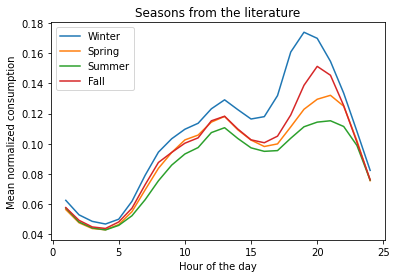

In [23]:
#seasons as mentioned in Klingler et al. 2016:
#winter
sdate_wi = date(2009, 11, 1)   # start date
edate_wi = date(2010, 3, 20)   # end date
#spring
sdate_sp = date(2010, 3, 21)   # start date
edate_sp = date(2010, 5, 14)   # end date
#summer
sdate_su = date(2010, 5, 15)   # start date
edate_su = date(2010, 9, 14)   # end date
#Fall
sdate_at = date(2010, 9, 15)   # start date
edate_at = date(2010, 10, 31)   # end date

#subplots of mean values over the defined seasons with fig and ax objects

y_wi = df.loc[str(sdate_wi):str(edate_wi)].groupby(["Hour_of_Day"]).norm_energy.mean()
y_sp = df.loc[str(sdate_sp):str(edate_sp)].groupby(["Hour_of_Day"]).norm_energy.mean()
y_su = df.loc[str(sdate_su):str(edate_su)].groupby(["Hour_of_Day"]).norm_energy.mean()
y_fa = df.loc[str(sdate_at):str(edate_at)].groupby(["Hour_of_Day"]).norm_energy.mean()

plt.plot(y_wi, label = "Winter")
plt.plot(y_sp,label ="Spring")
plt.plot(y_su, label ="Summer")
plt.plot(y_fa,label ="Fall")
plt.ylabel("Mean normalized consumption")
plt.xlabel("Hour of the day")
plt.title("Seasons from the literature")
plt.legend()

# #subplots of mean values over the defined seasons with plt.subplot
# plt.subplot(4,1,1, sharey="all")
# df.loc[str(sdate_wi):str(edate_wi)].groupby(["Hour_of_Day"]).norm_energy.mean().plot(figsize = (20,5))
# plt.subplot(4,1,2)
# df.loc[str(sdate_sp):str(edate_sp)].groupby(["Hour_of_Day"]).norm_energy.mean().plot(figsize = (20,5))
# plt.subplot(4,1,3)
# df.loc[str(sdate_su):str(edate_su)].groupby(["Hour_of_Day"]).norm_energy.mean().plot(figsize = (20,5))
# plt.subplot(4,1,4)
# df.loc[str(sdate_at):str(edate_at)].groupby(["Hour_of_Day"]).norm_energy.mean().plot(figsize = (20,5))

In [24]:
#correlation and cosin  distance matrix
lst = [y_wi,y_sp,y_su,y_fa]
df_cor = pd.DataFrame(data = lst)
cosin_dist = pairwise.cosine_similarity(df_cor) #cosin dist matrix
df_cor = df_cor.transpose()
#show mean of correlation matrix without including diagonal of 1
df_cor.corr().values[np.triu_indices_from(df_cor.corr().values,1)].mean()

0.9718899764842553

In [25]:
#mean of cosin dist matrix
cosin_dist.mean()

0.9974266868729091

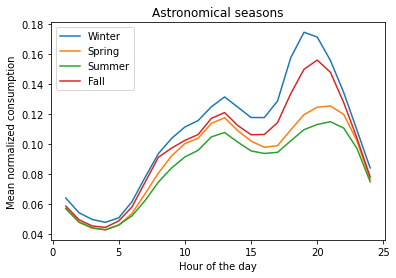

In [26]:
#astronomical seasons:
#winter
sdate_wi = date(2009, 12, 21)   # start date
edate_wi = date(2010, 3, 19)   # end date
#spring
sdate_sp = date(2010, 3, 20)   # start date
edate_sp = date(2010, 6, 20)   # end date
#summer
sdate_su = date(2010, 6, 21)   # start date
edate_su = date(2010, 9, 14)   # end date
#Fall
sdate_at = date(2010, 9, 15)   # start date
edate_at = date(2010, 12, 20)   # end date

y_wi = df.loc[str(sdate_wi):str(edate_wi)].groupby(["Hour_of_Day"]).norm_energy.mean()
y_sp = df.loc[str(sdate_sp):str(edate_sp)].groupby(["Hour_of_Day"]).norm_energy.mean()
y_su = df.loc[str(sdate_su):str(edate_su)].groupby(["Hour_of_Day"]).norm_energy.mean()
y_fa = df.loc[str(sdate_at):str(edate_at)].groupby(["Hour_of_Day"]).norm_energy.mean()

plt.plot(y_wi, label = "Winter")
plt.plot(y_sp,label ="Spring")
plt.plot(y_su, label ="Summer")
plt.plot(y_fa,label ="Fall")
plt.ylabel("Mean normalized consumption")
plt.xlabel("Hour of the day")
plt.title("Astronomical seasons")
plt.legend()



In [27]:
lst = [y_wi,y_sp,y_su,y_fa]
df_cor = pd.DataFrame(data = lst)
cosin_dist = pairwise.cosine_similarity(df_cor)
df_cor = df_cor.transpose()
df_cor.corr().values[np.triu_indices_from(df_cor.corr().values,1)].mean()

0.974813888814709

In [28]:
cosin_dist.mean()

0.9975972129987144

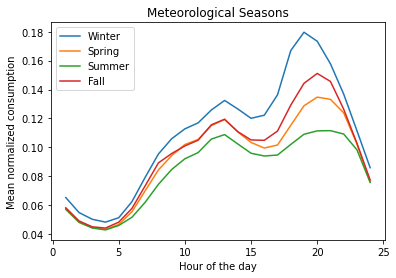

In [29]:
#Meteorological seasons:
#winter
sdate_wi = date(2009, 12, 1)   # start date
edate_wi = date(2010, 2, 28)   # end date
#spring
sdate_sp = date(2010, 3, 1)   # start date
edate_sp = date(2010, 5, 31)   # end date
#summer
sdate_su = date(2010, 6, 1)   # start date
edate_su = date(2010, 8, 31)   # end date
#Fall
sdate_at = date(2010, 9, 1)   # start date
edate_at = date(2010, 11, 30)   # end date

y_wi = df.loc[str(sdate_wi):str(edate_wi)].groupby(["Hour_of_Day"]).norm_energy.mean()
y_sp = df.loc[str(sdate_sp):str(edate_sp)].groupby(["Hour_of_Day"]).norm_energy.mean()
y_su = df.loc[str(sdate_su):str(edate_su)].groupby(["Hour_of_Day"]).norm_energy.mean()
y_fa = df.loc[str(sdate_at):str(edate_at)].groupby(["Hour_of_Day"]).norm_energy.mean()

plt.plot(y_wi, label = "Winter")
plt.plot(y_sp,label ="Spring")
plt.plot(y_su, label ="Summer")
plt.plot(y_fa,label ="Fall")
plt.ylabel("Mean normalized consumption")
plt.xlabel("Hour of the day")
plt.title("Meteorological Seasons")
plt.legend()

In [30]:
lst = [y_wi,y_sp,y_su,y_fa]
df_cor = pd.DataFrame(data = lst)
cosin_dist = pairwise.cosine_similarity(df_cor)
df_cor = df_cor.transpose()
df_cor.corr().values[np.triu_indices_from(df_cor.corr().values,1)].mean()

0.9737263336494005

In [31]:
cosin_dist.mean()

0.9975062767904728

In [32]:
df_week = df[df["Weekday"]==1] 

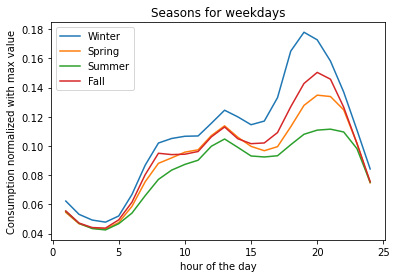

In [33]:
#Meteorological seasons:
#winter
sdate_wi = date(2009, 12, 1)   # start date
edate_wi = date(2010, 2, 28)   # end date
#spring
sdate_sp = date(2010, 3, 1)   # start date
edate_sp = date(2010, 5, 31)   # end date
#summer
sdate_su = date(2010, 6, 1)   # start date
edate_su = date(2010, 8, 31)   # end date
#Fall
sdate_at = date(2010, 9, 1)   # start date
edate_at = date(2010, 11, 30)   # end date

y_wi = df_week.loc[str(sdate_wi):str(edate_wi)].groupby(["Hour_of_Day"]).norm_energy.mean()
y_sp = df_week.loc[str(sdate_sp):str(edate_sp)].groupby(["Hour_of_Day"]).norm_energy.mean()
y_su = df_week.loc[str(sdate_su):str(edate_su)].groupby(["Hour_of_Day"]).norm_energy.mean()
y_fa = df_week.loc[str(sdate_at):str(edate_at)].groupby(["Hour_of_Day"]).norm_energy.mean()

plt.plot(y_wi, label = "Winter")
plt.plot(y_sp,label ="Spring")
plt.plot(y_su, label ="Summer")
plt.plot(y_fa,label ="Fall")
plt.ylabel("Consumption normalized with max value")
plt.xlabel("hour of the day")
plt.title("Seasons for weekdays")
plt.legend()



In [34]:
df_wknd = df[df["Weekday"]==2] 

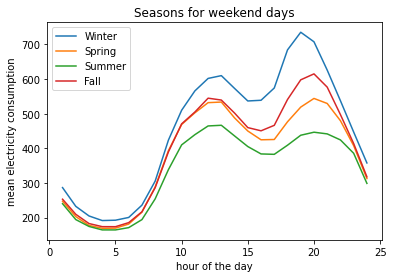

In [35]:
#Meteorological seasons:
#winter
sdate_wi = date(2009, 12, 1)   # start date
edate_wi = date(2010, 2, 28)   # end date
#spring
sdate_sp = date(2010, 3, 1)   # start date
edate_sp = date(2010, 5, 31)   # end date
#summer
sdate_su = date(2010, 6, 1)   # start date
edate_su = date(2010, 8, 31)   # end date
#Fall
sdate_at = date(2010, 9, 1)   # start date
edate_at = date(2010, 11, 30)   # end date

y_wi = df_wknd.loc[str(sdate_wi):str(edate_wi)].groupby(["Hour_of_Day"]).Electricity_Demand.mean()
y_sp = df_wknd.loc[str(sdate_sp):str(edate_sp)].groupby(["Hour_of_Day"]).Electricity_Demand.mean()
y_su = df_wknd.loc[str(sdate_su):str(edate_su)].groupby(["Hour_of_Day"]).Electricity_Demand.mean()
y_fa = df_wknd.loc[str(sdate_at):str(edate_at)].groupby(["Hour_of_Day"]).Electricity_Demand.mean()

plt.plot(y_wi, label = "Winter")
plt.plot(y_sp,label ="Spring")
plt.plot(y_su, label ="Summer")
plt.plot(y_fa,label ="Fall")
plt.ylabel("mean electricity consumption")
plt.xlabel("hour of the day")
plt.title("Seasons for weekend days")
plt.legend()



In [36]:
#add day_of_week column
df["day_of_week"]= df.index.weekday

<AxesSubplot:xlabel='Hour_of_Day'>

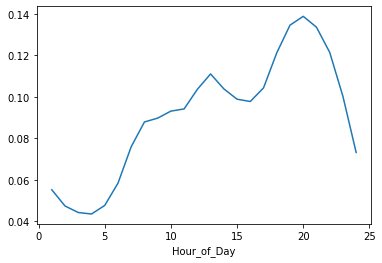

In [37]:
df[df["day_of_week"]== 1].groupby(["Hour_of_Day"]).norm_energy.mean().plot()

Text(0, 0.5, 'Mean normalized consumption')

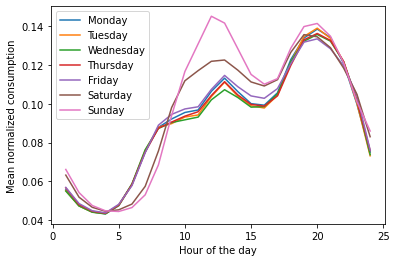

In [38]:
#plot mean representative load profiles for weekdays
week_lst = [0,1,2,3,4,5,6]
day_lst = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
for x in range(0,7):
    df[df["day_of_week"]== x].groupby(["Hour_of_Day"]).norm_energy.mean().plot(label = day_lst[x])
plt.legend()
plt.xlabel("Hour of the day")
plt.ylabel("Mean normalized consumption")

# Differences of the two normalization techniques

Text(0, 0.5, 'Consumption normalized with max value')

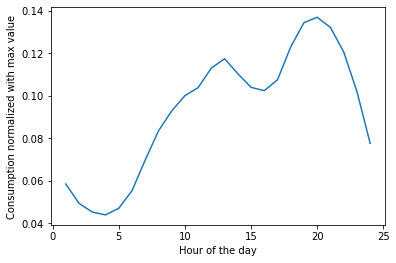

In [39]:
df.groupby(["Hour_of_Day"]).norm_energy.mean().plot()
plt.xlabel("Hour of the day")
plt.ylabel("Consumption normalized with max value")

Text(0, 0.5, 'Consumption normalized with daily max value')

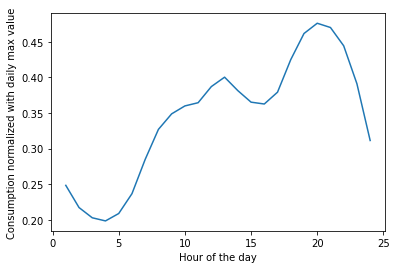

In [40]:
df_norm_day.groupby(["Hour_of_Day"]).norm_energy.mean().plot()
plt.xlabel("Hour of the day")
plt.ylabel("Consumption normalized with daily max value")